# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.utils import resample,shuffle

# Importing the dataset

In [2]:
cust_churn = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
cust_churn.shape

(7043, 21)

In [4]:
cust_churn.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
cust_churn['Churn'].value_counts(normalize = True)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [6]:
cust_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
cust_churn.loc[cust_churn['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
cust_churn.loc[cust_churn['TotalCharges']==' ','TotalCharges'] = 0

In [9]:
cust_churn['TotalCharges']= pd.to_numeric(cust_churn['TotalCharges'])

# Upsampling of Dataset

In [10]:
cust_no = cust_churn[cust_churn.Churn == 'No']
cust_yes = cust_churn[cust_churn.Churn == 'Yes']

In [11]:
upsampled_yes = resample(cust_yes,replace = True,n_samples=2470)

In [12]:
cust_churn = pd.concat([cust_no,upsampled_yes])
cust_churn = shuffle(cust_churn)

In [13]:
cust_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7644 entries, 5667 to 3362
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7644 non-null   object 
 1   gender            7644 non-null   object 
 2   SeniorCitizen     7644 non-null   int64  
 3   Partner           7644 non-null   object 
 4   Dependents        7644 non-null   object 
 5   tenure            7644 non-null   int64  
 6   PhoneService      7644 non-null   object 
 7   MultipleLines     7644 non-null   object 
 8   InternetService   7644 non-null   object 
 9   OnlineSecurity    7644 non-null   object 
 10  OnlineBackup      7644 non-null   object 
 11  DeviceProtection  7644 non-null   object 
 12  TechSupport       7644 non-null   object 
 13  StreamingTV       7644 non-null   object 
 14  StreamingMovies   7644 non-null   object 
 15  Contract          7644 non-null   object 
 16  PaperlessBilling  7644 non-null   objec

In [14]:
cust_churn['Churn'].value_counts()

No     5174
Yes    2470
Name: Churn, dtype: int64

In [15]:
list(cust_churn.select_dtypes('object'))

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [16]:
cust_dummy = pd.get_dummies(cust_churn[[
 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']],drop_first= True)

In [17]:
cust_dummy['customerID'] = cust_churn['customerID']

In [18]:
cust_dummy.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,customerID
5667,0,1,0,1,0,0,0,1,1,0,...,1,0,0,0,0,0,1,0,0,6469-QJKZW
2847,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,6985-HAYWX
1639,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,4690-LLKUA
130,0,0,0,1,0,1,1,0,0,0,...,0,1,0,0,1,0,1,0,0,2876-GZYZC
6130,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,5614-DNZCE


In [19]:
cust_float = cust_churn.select_dtypes(exclude='object')

In [20]:
cust_float['customerID'] = cust_churn['customerID']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
cust_float.shape

(7644, 5)

In [22]:
cust_final = cust_dummy.merge(cust_float)

In [23]:
cust_final.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,1,0,0,0,1,1,0,...,0,0,1,0,0,6469-QJKZW,0,4,20.15,91.4
1,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,6985-HAYWX,0,26,79.30,2015.8
2,1,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,4690-LLKUA,1,17,45.05,770.6
3,1,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,4690-LLKUA,1,17,45.05,770.6
4,1,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,4690-LLKUA,1,17,45.05,770.6


In [24]:
cust_final.shape

(10902, 32)

In [25]:
cust_final.drop(columns = 'customerID')

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,1,0,0,0,1,1,0,...,0,0,0,1,0,0,0,4,20.15,91.40
1,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,26,79.30,2015.80
2,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,1,17,45.05,770.60
3,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,1,17,45.05,770.60
4,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,1,17,45.05,770.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10897,1,1,1,1,0,1,0,1,1,0,...,1,0,0,0,1,0,0,52,25.75,1345.85
10898,1,0,0,1,0,0,0,1,1,0,...,0,1,1,0,0,0,0,2,19.90,33.70
10899,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,49.55,49.55
10900,0,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,14,59.45,780.85


In [26]:
report = pp.ProfileReport(cust_final)

In [27]:
report

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# Removing Outliers: -

In [28]:
cust_final['TotalCharges'] = np.where(cust_final['TotalCharges']>7529,7529,cust_final['TotalCharges'])

# Dropping Highly Correlated Variable

In [29]:
cust_final = cust_final.drop(columns=['customerID','StreamingMovies_No internet service','StreamingTV_No internet service','TechSupport_No internet service','DeviceProtection_No internet service','OnlineBackup_No internet service','InternetService_No','OnlineSecurity_No internet service','PhoneService_Yes','MultipleLines_No phone service','InternetService_Fiber optic'])

# Creating X & y :-

In [30]:
X = cust_final.drop(columns = 'Churn_Yes')
y = cust_final['Churn_Yes']

# Splitting the Dataset into Training & Testing

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 123)

# Decision Tree-1

In [33]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1235  281]
 [ 109 1646]]


## Applying k-Fold Cross Validation

In [35]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 87.25 %
Standard Deviation: 0.95 %


# Classification report

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1516
           1       0.85      0.94      0.89      1755

    accuracy                           0.88      3271
   macro avg       0.89      0.88      0.88      3271
weighted avg       0.88      0.88      0.88      3271



# Checking AUC value:-

In [37]:
print('AUPRC = {}'.format(roc_auc_score(y_test, y_pred)))

AUPRC = 0.8762677686820167


# Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='entropy', random_state=0,n_estimators=100)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

# Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1347  169]
 [ 118 1637]]


## Applying k-Fold Cross Validation

In [40]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.59 %
Standard Deviation: 0.70 %


## Applying Grid Search to find the best model and the best parameters

In [41]:
from sklearn.model_selection import GridSearchCV
parameters = [{'criterion':['entropy','gini'],'min_samples_split':range(2,10),'n_estimators':range(50,250,50),'max_depth':range(5,20,1)}]
grid_search = RandomizedSearchCV(estimator = classifier,
                           param_distributions= parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 90.81 %
Best Parameters: {'n_estimators': 50, 'min_samples_split': 3, 'max_depth': 17, 'criterion': 'gini'}


In [42]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='entropy', random_state=0,n_estimators=50,min_samples_split = 3,max_depth = 16)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=16, min_samples_split=3,
                       n_estimators=50, random_state=0)

# Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1318  198]
 [ 109 1646]]


## Applying k-Fold Cross Validation

In [44]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.50 %
Standard Deviation: 0.67 %


# Classification report

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90      1516
           1       0.89      0.94      0.91      1755

    accuracy                           0.91      3271
   macro avg       0.91      0.90      0.91      3271
weighted avg       0.91      0.91      0.91      3271



# Checking AUC value:-

In [46]:
print('AUPRC = {}'.format(roc_auc_score(y_test, y_pred)))

AUPRC = 0.9036424388667134


# 5) XGBoost:-

In [47]:

from xgboost.sklearn import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Confusion Matrix

In [48]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1267  249]
 [ 118 1637]]


## Applying k-Fold Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 88.40 %
Standard Deviation: 0.70 %


In [50]:
param_grid = {'n_estimators': range(50,500,50),
                    'learning_rate': [ 0.1, 0.15,0.2,0.25],
                    'gamma':  [0.20,0.10, 0.15],
                    'max_delta_step': [24, 26, 22],
                    'max_depth':range(2,20),
             'min_child_weight': [1, 2, 3, 4]}       

ransearch = RandomizedSearchCV(classifier, n_iter = 50, param_distributions=param_grid, cv=5, n_jobs=-1, verbose=2)
ransearch = ransearch.fit(X_train,y_train)
best_accuracy = ransearch.best_score_
best_parameter = ransearch.best_params_
print('Accuracy: {:.2f}%'.format(best_accuracy*100))
print('parameter:',best_parameter)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.4min finished


Accuracy: 89.42%
parameter: {'n_estimators': 250, 'min_child_weight': 1, 'max_depth': 11, 'max_delta_step': 26, 'learning_rate': 0.1, 'gamma': 0.15}


In [51]:
classifier = XGBClassifier(n_estimators=100,
 max_depth= 17,
 max_delta_step = 24,
 learning_rate = 0.25,
 gamma = 0.15,
min_child_weight = 1)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.15, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=24, max_depth=17,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Confusion Matrix: -

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1322  194]
 [ 106 1649]]


# Classification Report: -

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1516
           1       0.89      0.94      0.92      1755

    accuracy                           0.91      3271
   macro avg       0.91      0.91      0.91      3271
weighted avg       0.91      0.91      0.91      3271



## Applying k-Fold Cross Validation

In [54]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 89.65 %
Standard Deviation: 0.97 %


# Checking AUC value:-

In [55]:
print('AUPRC = {}'.format(roc_auc_score(y_test, y_pred)))

AUPRC = 0.9058164009351345


# Feature Importance :-

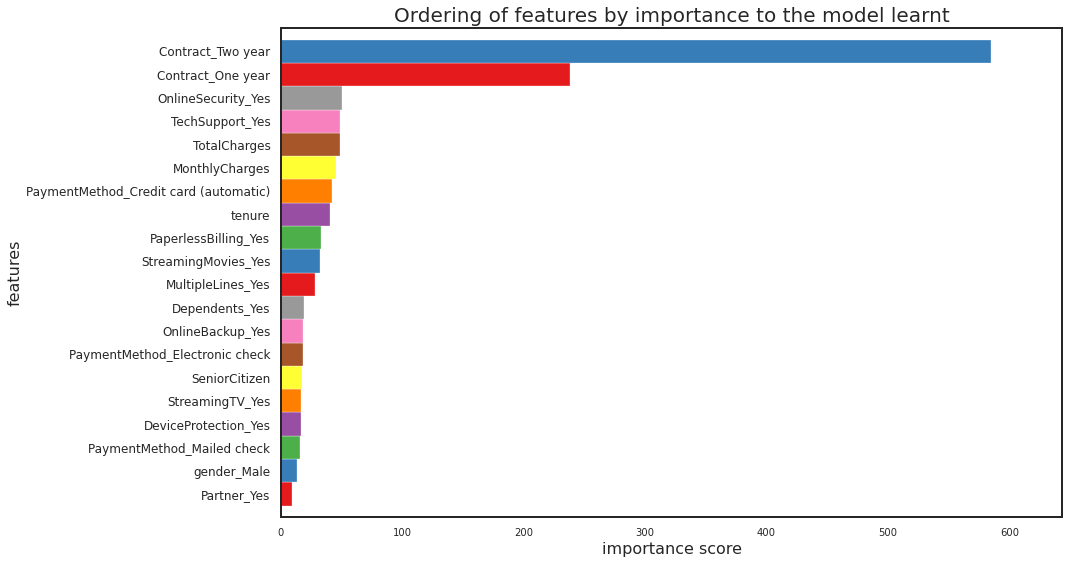

In [56]:
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(classifier, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);